In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
# load airline monthly data
df = pd.read_csv('Data/airline_passengers.csv', index_col = 'Month')
df.dropna(inplace = True)
df.index = pd.to_datetime(df.index)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [69]:
# set frequency to be able to use statsmodels
df.index.freq = 'MS'

In [70]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [71]:
from matplotlib import dates

[Text(0, 0.5, 'No. of passengers in thousands')]

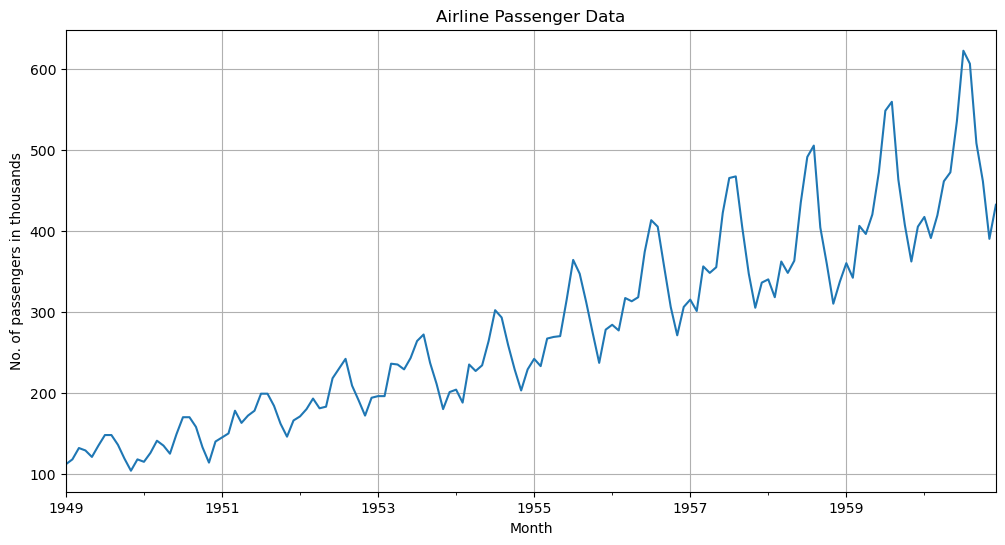

In [72]:
ax = df['Thousands of Passengers'].plot(figsize = (12,6), grid = True, title = "Airline Passenger Data")
ax.set(ylabel = 'No. of passengers in thousands')

### Train Test Split
The most recent end of the data will be the test data. Therefore, the size of the test data depends on how far ahead in time we want to forecast.

In [73]:
train = df.iloc[:110]
test = df.iloc[109:]

In [74]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [75]:
fitted_model = ExponentialSmoothing(train['Thousands of Passengers'], trend = 'mul',
                                    seasonal = 'mul', seasonal_periods = 12).fit()

C:\Users\shisk\anaconda3\envs\sklearn\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [76]:
# forecast the next 36 datapoints
test_predictions = fitted_model.forecast(35)
test_predictions

1958-03-01    370.136856
1958-04-01    361.576591
1958-05-01    364.437575
1958-06-01    419.840170
1958-07-01    466.860289
1958-08-01    463.227468
1958-09-01    408.367606
1958-10-01    356.396625
1958-11-01    313.057399
1958-12-01    354.273636
1959-01-01    362.404332
1959-02-01    351.663126
1959-03-01    409.319132
1959-04-01    399.852686
1959-05-01    403.016531
1959-06-01    464.283982
1959-07-01    516.281600
1959-08-01    512.264212
1959-09-01    451.596946
1959-10-01    394.124374
1959-11-01    346.197307
1959-12-01    391.776648
1960-01-01    400.768051
1960-02-01    388.889793
1960-03-01    452.649199
1960-04-01    442.180646
1960-05-01    445.679412
1960-06-01    513.432568
1960-07-01    570.934595
1960-08-01    566.491931
1960-09-01    499.402495
1960-10-01    435.845942
1960-11-01    382.845368
1960-12-01    433.249688
1961-01-01    443.192911
Freq: MS, dtype: float64

### Plot Predicted vs Actual Data

<Axes: xlabel='Month'>

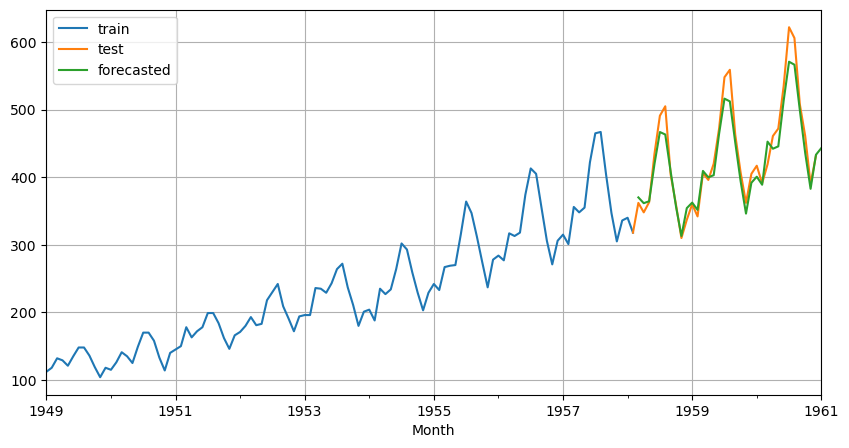

In [77]:
train['Thousands of Passengers'].plot(figsize = (10, 5), legend = True, label = 'train')
test['Thousands of Passengers'].plot(figsize = (10, 5), legend = True, label = 'test')
test_predictions.plot(figsize = (10, 5), legend = True, grid = True, label = 'forecasted')

<Axes: xlabel='Month'>

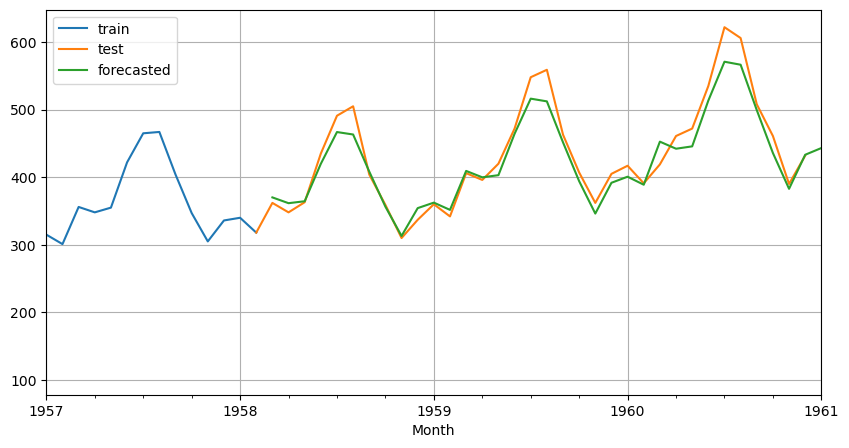

In [78]:
train['Thousands of Passengers'].plot(figsize = (10, 5), legend = True, label = 'train')
test['Thousands of Passengers'].plot(figsize = (10, 5), legend = True, label = 'test')
test_predictions.plot(figsize = (10, 5), legend = True, grid = True, label = 'forecasted',
                      xlim =['1957-01-01', '1961-01-01'])

### Evaluating Prediction
Time-series data is continuous therefore it needs a different evaluated like regression data.

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [82]:
test.describe()

,Thousands of Passengers
count,35.000000
mean,431.028571
std,79.001670
min,310.000000
25%,362.500000
50%,417.000000
75%,472.000000
max,622.000000


In [80]:
mean_absolute_error(test, test_predictions)

42.91494363744829

In [81]:
mean_squared_error(test, test_predictions)

2606.2659877484552

In [83]:
np.sqrt(mean_squared_error(test, test_predictions))

51.05160122609726

Since the error values are smaller than the standard deviation of the entire dataset, the model was able to perform quite well.

## Foecasting on Future Data
Now that we have trained and tested the model, we can forecast on future data after fitting the model to the entire data.

In [86]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'], trend = 'mul', seasonal = 'mul',
                                   seasonal_periods = 12).fit()

C:\Users\shisk\anaconda3\envs\sklearn\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [87]:
future_prediction = final_model.forecast(36)

### Plot Forecasted Data

[Text(0, 0.5, 'No. of passengers in thousands')]

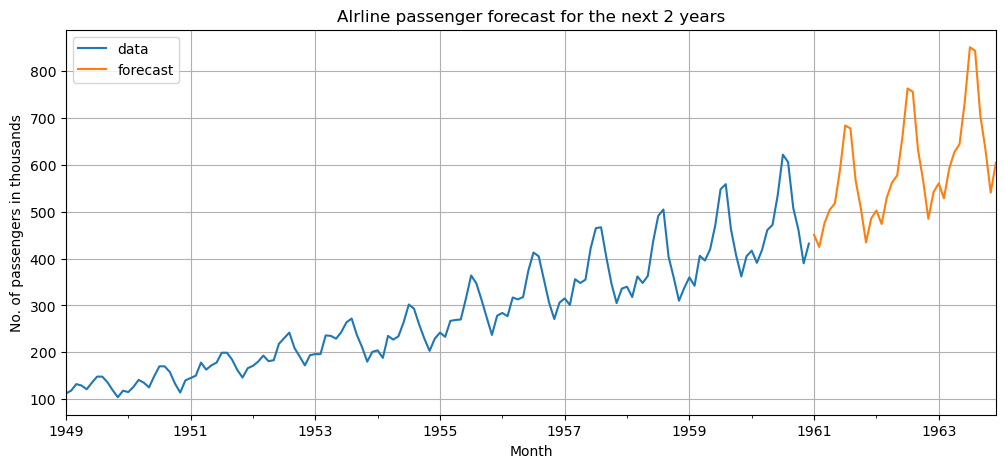

In [90]:
df['Thousands of Passengers'].plot(figsize = (12, 5), legend = 'True', label = 'data')
ax = future_prediction.plot(figsize = (12, 5), legend = 'True', label = 'forecast', grid = True,
                       title = 'AIrline passenger forecast for the next 2 years')
ax.set(ylabel = 'No. of passengers in thousands')

### Stationary VS Non-Stationary Data

<Axes: >

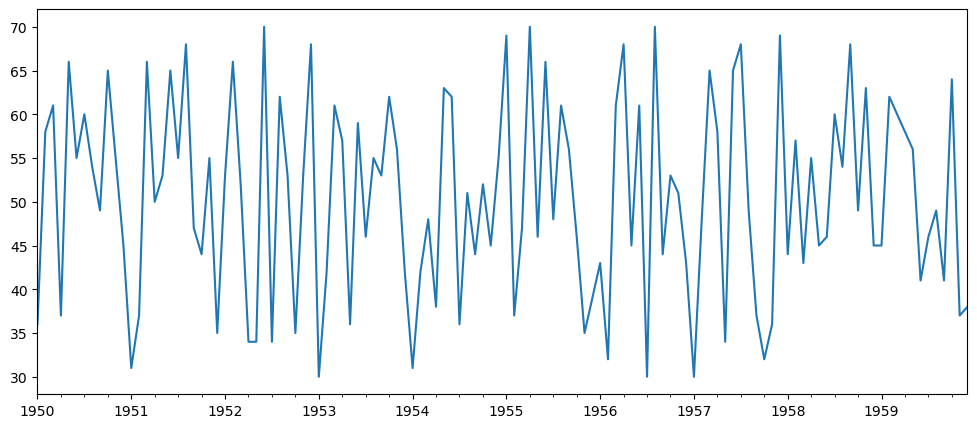

In [92]:
df2 = pd.read_csv('Data/samples.csv', index_col = 0, parse_dates = True, grid = 2, title = 'Stationary Data')
df2['a'].plot(figsize = (12, 5))
# Stationary data does not 